# Predicting heart disease using machine learning

This notebook looks into using machine learning and data science libraries in as attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes 

## Preparing the tools 

we're going to use pandas, Matplotlib, Numpy for data Analysis and Manipulation

In [1]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Models for scikit-learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("data/Heart_Disease.csv") 
df.shape

(303, 14)

## Data Exploration(Exploratory data analysis EDA) 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# let's find out how many of each class 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

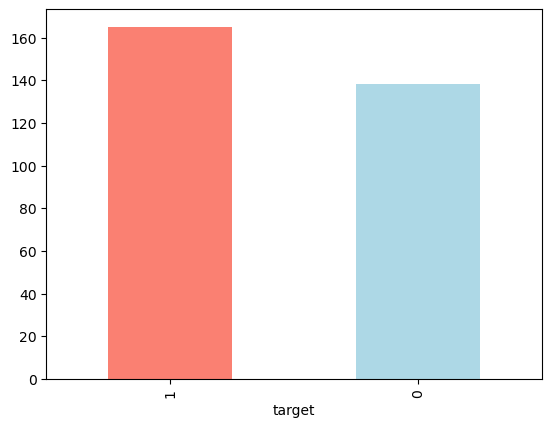

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# are there any missing value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart Disease frequency according to Sex 

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# compare target column with sex colume 
pd.crosstab(df["target"], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


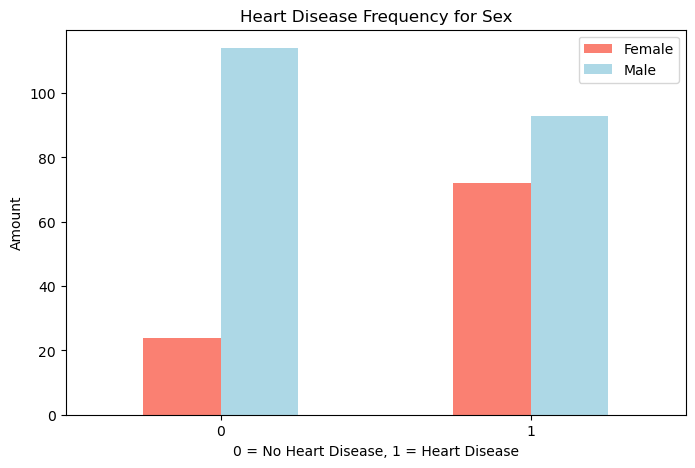

In [12]:
pd.crosstab(df["target"], df['sex']).plot(kind='bar',
                                         figsize=(8, 5), 
                                         color = ["salmon", "lightblue"])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease') 
plt.ylabel('Amount')
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [15]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


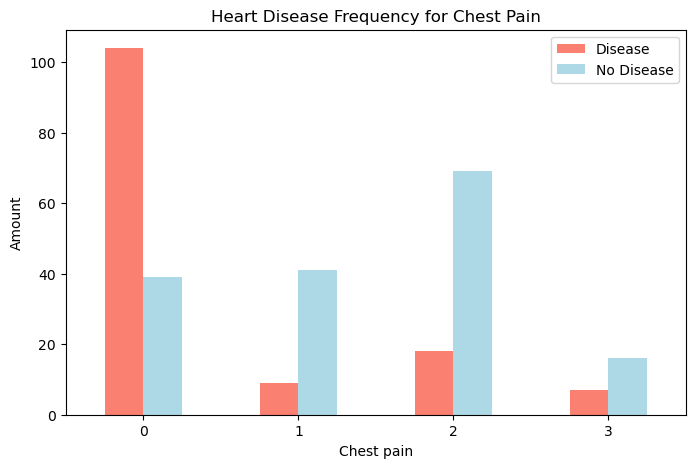

In [16]:
pd.crosstab(df["cp"], df['target']).plot(kind='bar',
                                         figsize=(8, 5), 
                                         color = ["salmon", "lightblue"])
plt.title('Heart Disease Frequency for Chest Pain')
plt.xlabel('Chest pain') 
plt.ylabel('Amount')
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0)
plt.show()

## Age vs. Heart Rate for Heart Disease 

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


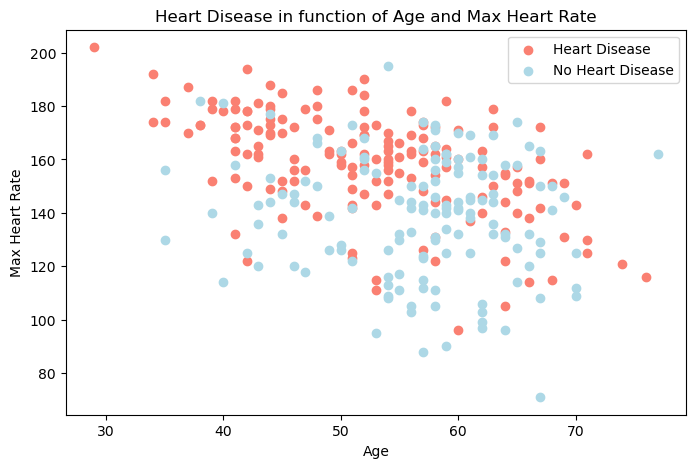

In [18]:
# create another fiqure 
plt.figure(figsize=(8,5)) 

# scatter with positve examples 
plt.scatter(df.age[df.target==1], 
           df.thalach[df.target==1], 
           c='salmon')

# scatter with the negative examples 
plt.scatter(df.age[df.target==0], 
           df.thalach[df.target==0], 
           c='lightblue');

# Add some usefull info 
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease']);

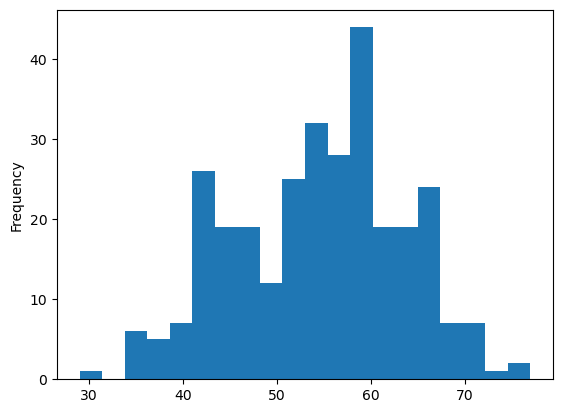

In [19]:
# check the age distribution with Histograph 
df['age'].plot.hist(bins = 20);

In [20]:
# Make a correlation Matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


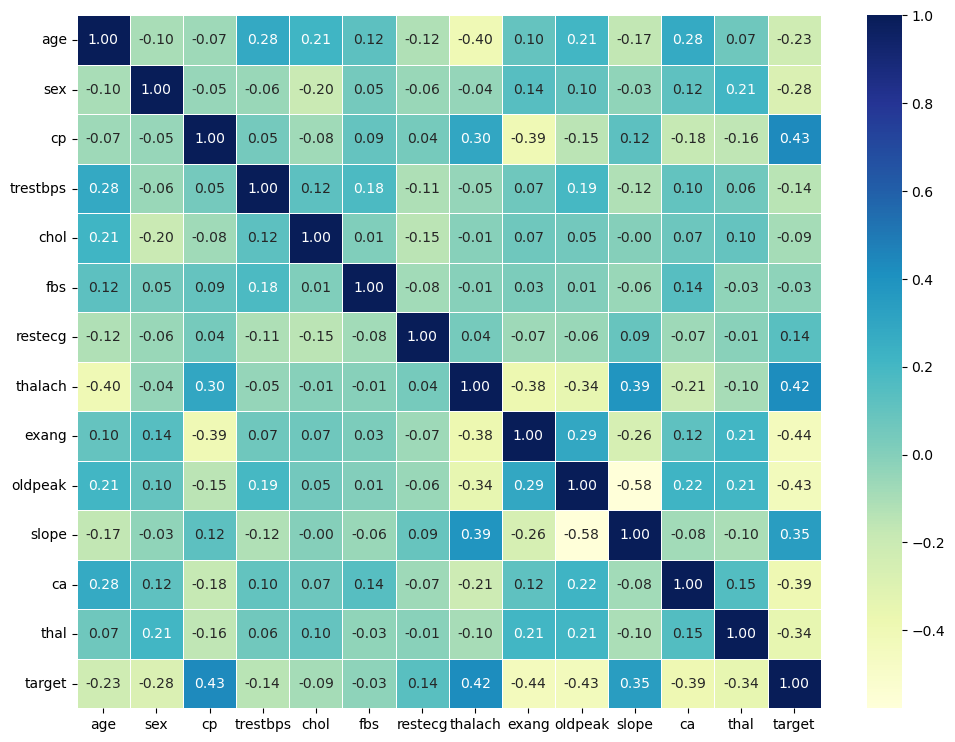

In [21]:
# let's make our correlation matrix prettier 
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(12, 9)) 
ax= sns.heatmap(corr_matrix, 
               annot=True, 
               linewidths=0.5, 
               fmt = '.2f', 
               cmap= "YlGnBu")

In [22]:
# prepare the data. split into X and y dataset 
X = df.drop("target", axis=1) 
y = df["target"]

# split into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y, 
                                                 test_size=0.2)

In [23]:
len(X_train), len(y_train), len(X_test), len(y_test)

(242, 242, 61, 61)

In [24]:
# put models in dictionary
models = {"RandomForest": RandomForestClassifier(),
        "LogisticRegression": LogisticRegression(), 
        "KNN": KNeighborsClassifier()} 

#  create a function to fit and score models 
def fit_and_score(models, X_train, y_train, X_test, y_test):
    # Make an empty dictionary
    model_scores = {}

    # Create a random seed 
    np.random.seed(42) 

    # fit and evaluate the models 
    for model_name, model in models.items(): 
        model.fit(X_train, y_train) 
        model_scores[model_name]= model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models= models,
                             X_train= X_train,
                             y_train= y_train,
                             X_test= X_test,
                             y_test= y_test) 
model_scores

C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.8360655737704918,
 'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344}

### Model Comparison

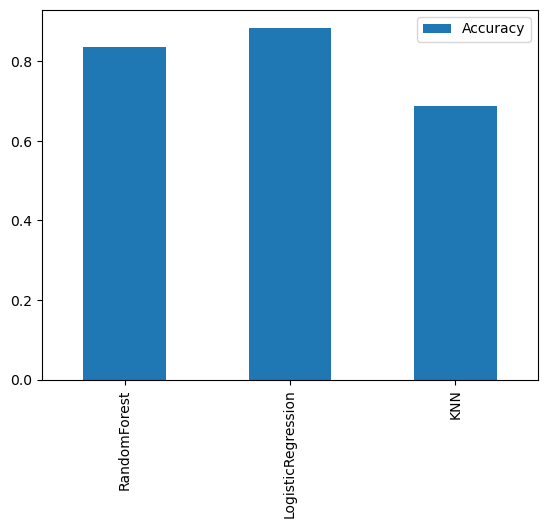

In [26]:
model_compare = pd.DataFrame(model_scores, 
                             index=["Accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Turning Using RandomizedSearchCV

In [27]:
# Create a Hyperparameter grid for LogisticRegression 
log_reg_grid = {'C': np.logspace(-4, 4, 20),              
                    
    'solver': ['liblinear', 'saga']}         
    

# Create a Hyperparameter grid for RandomForestClassifier 
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2) 
          }

In [28]:
# Tune the LogisticRegression

# setup random seed 
np.random.seed(42) 

# Instaniate the Logistic Regression 
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=0)

# Fit the instance o the RRandomizedSearchCV
rs_log_reg.fit(X_train, y_train)



C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\s

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'saga']})

In [29]:
# Find the best parameter of the RRandomizedSearchCV instance using best_params_ 
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [31]:
# Let's now turn the RanRandomForestClassifier 

# setup random seed 
np.random.seed(42) 

# Instaniate the RandomForestClassifer 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the instance of the RandomizedSearchCV
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 610, 'min_samples_split': 12, 'max_depth': 3}

In [33]:
# Score the instance of the RandomizedSearchCV 
rs_rf.score(X_test, y_test)

0.8688524590163934

In [34]:
model_scores

{'RandomForest': 0.8360655737704918,
 'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344}

## Hyperparemeter Turning with GridSearchCV 

Since LogisticRegression has produced the best rest so far... let's see if we can improve it with GridSearchCV

In [35]:
# Create a Hyperparameter grid for LogisticRegression 
log_reg_grid = {'C': np.logspace(-4, 4, 30),              
                'solver': ['liblinear', 'saga']}         

# Setup grid hyperparameter search for logisticRegression 
gs_log_reg = GridSearchCV(estimator=LogisticRegression(), 
                         param_grid= log_reg_grid, 
                         cv=5, 
                         verbose=0) 

# Fit the instance o the GridSearchCV
gs_log_reg.fit(X_train, y_train)

C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'saga']})

In [36]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
# score the model 
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluate our turned machine learning classifer beyond accuracy 

* ROC Curve and AUC score 
* Confusion Matrix 
* Classification Report
* Precision 
* Recall 
* F1 score 

... and it will be great if cross-validation was used where possible 

In [38]:
# Make prediction with our tuned model 
y_preds = gs_log_reg.predict(X_test) 
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

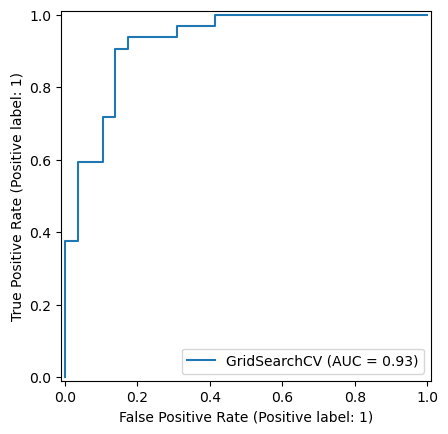

In [39]:
# plot ROC curve and calulate AUC metric 
roc_display = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [40]:
# # Confusion Matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [44]:
# print clclassification_report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [45]:
## Calculate evaluation metric using cross- validation 
# check best hyperparameter 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# create a new classifer with the best parameter  
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [47]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf, 
                        X, 
                        y, 
                        cv=5, 
                        scoring= "accuracy") 
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [48]:
# Cross-validated precision
cv_precision = cross_val_score(clf, 
                        X, 
                        y, 
                        cv=5, 
                        scoring= "precision") 
cv_precision = cv_precision.mean() 
cv_precision

0.8207936507936507

In [49]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                        X, 
                        y, 
                        cv=5, 
                        scoring= "recall") 
cv_recall = cv_recall.mean() 
cv_recall

0.9212121212121213

In [50]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf, 
                        X, 
                        y, 
                        cv=5, 
                        scoring= "f1") 
cv_f1 = cv_f1.mean() 
cv_f1

0.8673007976269721

In [51]:
# Visualize the cross-validated metric 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, 
                          "Precision": cv_precision, 
                          "Recall": cv_recall, 
                          "f1": cv_f1}, 
                         index=[0]) 
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.844699,0.820794,0.921212,0.867301


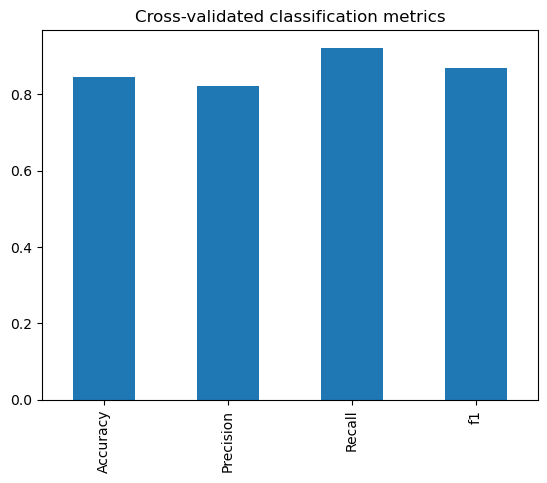

In [52]:
cv_metrics.T.plot(kind="bar",
                 title="Cross-validated classification metrics",
                  legend=False);

### Feature Importance 

Feature importance is another way of asking, "which feature contributed 
most to the outcome of the model and how did they contribute"

Finding feature is different for each machine learning 

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
# Fit an intance of LogisticRegression 
clf = LogisticRegression(C=0.20433597178569418, 
                        solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [55]:
# check coef_ 
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [58]:
# save mmodel 
import joblib

joblib.dump(clf, "heart_disease_prediction.joblib")

['heart_disease_prediction.joblib']

In [59]:
# load model 
loaded_model = joblib.load("heart_disease_prediction.joblib")

In [60]:
# Score model 
loaded_model.score(X_test, y_test)

0.8852459016393442